# Analysis of item parameter values for the two clusters


To run the code below, you must upload all "irt_item_param_*.csv" files to google colab content path.

The required csv files are in "Cluster 0/contet/out_irt" and "Cluster 0/contet/out_irt".

In [ ]:
!pip install adjustText
!pip install catsim

from catsim.irt import icc
from scipy.interpolate import interp1d
import numpy as np
import catsim.plot as catplot
import math
import pandas as pd
import statistics as sts
from matplotlib import pyplot
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from adjustText import adjust_text
from numpy import linspace

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for adjustText: filename=adjustText-0.7.3-py3-none-any.whl size=7097 sha256=6a236b12e23837d7624a9a87f5f278a4812abfdb05b8f6709632dae4ed6a98b8
  Stored in directory: /root/.cache/pip/wheels/2f/98/32/afbf902d8f040fadfdf0a44357e4ab750afe165d873bf5893d
Successfully built adjustText
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 48 kB 3.0 MB/s 


In [ ]:
def normalize(df):
    # copy the dataframe
    df_norm = df.copy()
    # apply min-max scaling
    for column in df_norm.columns:
        if(len(df_norm[column].unique()) > 1): #fix NaN generation
          df_norm[column] = (df_norm[column] - df_norm[column].min()) / (df_norm[column].max() - df_norm[column].min())
        else:
          df_norm[column] = 0
    return df_norm

def z_score(df):
    # copy the dataframe
    df_std = df.copy()
    # apply the z-score method
    for column in df_std.columns:
        df_std[column] = (df_std[column] - df_std[column].mean()) / df_std[column].std()
    
    return df_std

#trata outliers dificudade
def trataOutliersDif(listDif):
  limMin = -4
  limMax =  4
  for i, val in enumerate(listDif):
    if val > limMax:
      listDif[i] = limMax
    else:
      if val < limMin:
        listDif[i] = limMin
  return listDif

def trataOutliersDis(listDis):
  limMin = -2.5
  limMax =  2.5
  for i, val in enumerate(listDis):
    if val > limMax:
      listDis[i] = limMax
    else:
      if val < limMin:
        listDis[i] = limMin
  return listDis

def trataOutliersGues(listGues):
  limMin = 0
  limMax =  1
  for i, val in enumerate(listGues):
    if val > limMax:
      listGues[i] = limMax
    else:
      if val < limMin:
        listGues[i] = limMin
  return listGues

## Identification of general means and medians

reading: 0 irt_item_param_ionosphere_rf.csv
reading: 1 irt_item_param_wdbc_rf.csv
reading: 2 irt_item_param_credit-g_rf.csv
reading: 3 irt_item_param_churn_rf.csv
reading: 4 irt_item_param_Australian_rf.csv
reading: 5 irt_item_param_eeg-eye-state_rf.csv
reading: 6 irt_item_param_heart-statlog_rf.csv
reading: 7 irt_item_param_ilpd_rf.csv
reading: 8 irt_item_param_tic-tac-toe_rf.csv
reading: 9 irt_item_param_jEdit_4.0_4.2_rf.csv
reading: 10 irt_item_param_diabetes_rf.csv
reading: 11 irt_item_param_prnn_crabs_rf.csv
reading: 12 irt_item_param_monks-problems-1_rf.csv
reading: 13 irt_item_param_monks-problems-3_rf.csv
reading: 14 irt_item_param_monks-problems-2_rf.csv
reading: 15 irt_item_param_delta_ailerons_rf.csv
reading: 16 irt_item_param_mozilla4_rf.csv
reading: 17 irt_item_param_phoneme_rf.csv
reading: 18 irt_item_param_blood-transfusion-service-center_rf.csv
reading: 19 irt_item_param_banknote-authentication_rf.csv
reading: 20 irt_item_param_haberman_rf.csv
reading: 21 irt_item_param

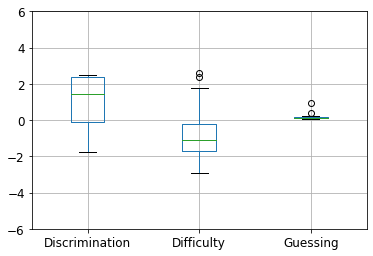

In [ ]:
def calc(data):
  return sts.mean(data)

def calc2(data):
  return sts.median(data)

model_name = 'rf'
pre_name = 'irt_item_param_'

list_all_datasets = [
                    'ionosphere', 
                     'wdbc', 'credit-g', 
                     'churn', 'Australian', 
                     'eeg-eye-state', 'heart-statlog', 
                     'ilpd', 'tic-tac-toe', 
                     'jEdit_4.0_4.2', 
                     'diabetes', 
                     'prnn_crabs', 
                     'monks-problems-1', 
                     'monks-problems-3', 
                     'monks-problems-2', 
                     'delta_ailerons', 
                     'mozilla4', 
                     'phoneme', 
                     'blood-transfusion-service-center', 
                     'banknote-authentication', 
                     'haberman',
                     'ozone-level-8hr', 
                     'sonar', 
                     'spambase', 
                     'qsar-biodeg', 
                     'kc3', 
                     'mc1', 
                     'pc3', 
                     'mw1', 
                     'pc4', 
                     'Satellite', 
                     'pc2', 
                     'steel-plates-fault', 
                     'kc2', 
                     'pc1', 
                     'kc1', 
                     'climate-model-simulation-crashes'
                     ]

final_name = '_'+model_name+'.csv'

list_exec = list_all_datasets

mean_discrimicacao = []
mean_dificuldade = []
mean_adivinhacao = []

for i,data_name in enumerate(list_exec):
  name_file = pre_name+data_name+final_name
  print('reading: '+str(i)+' '+name_file)
  dataset = pd.read_csv(name_file)
  dataset = dataset.drop('Unnamed: 0',axis=1)
  # = normalize(dataset)
  dataset['Dificuldade'] = trataOutliersDif(dataset['Dificuldade'])
  dataset['Discriminacao'] = trataOutliersDis(dataset['Discriminacao'])
  dataset['Adivinhacao'] = trataOutliersGues(dataset['Adivinhacao'])
  
  mean_discrimicacao.append(calc(dataset['Discriminacao']))
  mean_dificuldade.append(calc(dataset['Dificuldade']))
  mean_adivinhacao.append(calc(dataset['Adivinhacao']))


df = pd.DataFrame(list(zip(mean_discrimicacao, mean_dificuldade,mean_adivinhacao)),columns =['Discrimination', 'Difficulty','Guessing'])

ax = df.boxplot(rot=0,fontsize=12,column=['Discrimination', 'Difficulty','Guessing'])

ax.set_ylim(-6, 6)
print('Model Name: '+model_name)
print('Cluster: 0 e 1')
print('Mediana Discriminação: '+str(calc2(mean_discrimicacao)))
print('Mediana Dificuldade: '+str(calc(mean_dificuldade)))
print('Mediana Adivinhação: '+str(calc2(mean_adivinhacao)))

lim_discriminacao = calc2(mean_discrimicacao)
lim_dificuldade = calc(mean_dificuldade)
lim_adivinhacao = calc2(mean_adivinhacao)


## Threshold definition and percentage calculation

In [ ]:

pre_name = 'irt_item_param_'

#https://douglasrizzo.com.br/catsim/irt.html


#### Cluster 0

list_cluster_0 = ['ionosphere', 'wdbc', 'credit-g', 'churn', 'Australian', 'eeg-eye-state', 'heart-statlog', 'ilpd', 'tic-tac-toe', 'jEdit_4.0_4.2', 'diabetes', 'prnn_crabs', 'monks-problems-1', 'monks-problems-3', 'monks-problems-2', 'delta_ailerons', 'mozilla4', 'phoneme', 'blood-transfusion-service-center', 'banknote-authentication', 'haberman']

final_name = '_'+model_name+'.csv'

list_exec = list_cluster_0

perc_discriminacao_c0 = []
perc_dificuldade_c0 = []
perc_adivinhacao_c0 = []

means_discriminacao_c0 = []
means_dificuldade_c0 = []
means_adivinhacao_c0 = []


for i,data_name in enumerate(list_exec):
  name_file = pre_name+data_name+final_name
  print('reading: '+name_file)
  dataset0 = pd.read_csv(name_file)
  dataset0 = dataset0.drop('Unnamed: 0',axis=1)
  #dataset0 = normalize(dataset0)
  dataset0['Dificuldade'] = trataOutliersDif(dataset0['Dificuldade'])
  dataset0['Discriminacao'] = trataOutliersDis(dataset0['Discriminacao'])
  dataset0['Adivinhacao'] = trataOutliersGues(dataset0['Adivinhacao'])
  perc_discriminacao_c0.append((sum(dataset0['Discriminacao'] >= lim_discriminacao) * 100) /  len(dataset0['Discriminacao']))
  perc_dificuldade_c0.append((sum(dataset0['Dificuldade'] >= lim_dificuldade) * 100) /  len(dataset0['Dificuldade']))
  perc_adivinhacao_c0.append((sum(dataset0['Adivinhacao'] >= lim_adivinhacao) * 100) /  len(dataset0['Adivinhacao']))
  means_discriminacao_c0.append(sts.mean(dataset0['Discriminacao']))
  means_dificuldade_c0.append(sts.mean(dataset0['Dificuldade']))
  means_adivinhacao_c0.append(sts.mean(dataset0['Adivinhacao']))


####  Cluster 1

list_cluster_1 = ['ozone-level-8hr', 'sonar', 'spambase', 'qsar-biodeg', 'kc3', 'mc1', 'pc3', 'mw1', 'pc4', 'Satellite', 'pc2', 'steel-plates-fault', 'kc2', 'pc1', 'kc1', 'climate-model-simulation-crashes']

#remove large dataset
list_cluster_1_ = ['sonar', 'qsar-biodeg', 'kc3', 'mw1', 'pc4', 'kc2', 'pc1', 'climate-model-simulation-crashes']


final_name = '_'+model_name+'.csv'

list_exec = list_cluster_1

perc_discriminacao_c1 = []
perc_dificuldade_c1 = []
perc_adivinhacao_c1 = []

means_discriminacao_c1 = []
means_dificuldade_c1 = []
means_adivinhacao_c1 = []

for i,data_name in enumerate(list_exec):
  name_file = pre_name+data_name+final_name
  print('reading: '+name_file)
  dataset1 = pd.read_csv(name_file)
  dataset1 = dataset1.drop('Unnamed: 0',axis=1)
  #dataset1 = normalize(dataset1)
  dataset1['Dificuldade'] = trataOutliersDif(dataset1['Dificuldade'])
  dataset1['Discriminacao'] = trataOutliersDis(dataset1['Discriminacao'])
  dataset1['Adivinhacao'] = trataOutliersGues(dataset1['Adivinhacao'])
  perc_discriminacao_c1.append((sum(dataset1['Discriminacao'] >= lim_discriminacao) * 100) /  len(dataset1['Discriminacao']))
  perc_dificuldade_c1.append((sum(dataset1['Dificuldade'] >= lim_dificuldade) * 100) /  len(dataset1['Dificuldade']))
  perc_adivinhacao_c1.append((sum(dataset1['Adivinhacao'] >= lim_adivinhacao) * 100) /  len(dataset1['Adivinhacao']))
  means_discriminacao_c1.append(sts.mean(dataset1['Discriminacao']))
  means_dificuldade_c1.append(sts.mean(dataset1['Dificuldade']))
  means_adivinhacao_c1.append(sts.mean(dataset1['Adivinhacao']))



df0 = pd.DataFrame(list(zip(perc_discriminacao_c0, perc_dificuldade_c0,perc_adivinhacao_c0)),columns =['Discrimination', 'Difficulty','Guessing'])
df1 = pd.DataFrame(list(zip(perc_discriminacao_c1, perc_dificuldade_c1,perc_adivinhacao_c1)),columns =['Discrimination', 'Difficulty','Guessing'])

median_discriminacao_c0 = sts.median(means_discriminacao_c0)
median_dificuldade_c0 = sts.median(means_dificuldade_c0)
median_adivinhacao_c0 = sts.median(means_adivinhacao_c0)

median_discriminacao_c1 = sts.median(means_discriminacao_c1)
median_dificuldade_c1 = sts.median(means_dificuldade_c1)
median_adivinhacao_c1 = sts.median(means_adivinhacao_c1)

reading: irt_item_param_ionosphere_rf.csv
reading: irt_item_param_wdbc_rf.csv
reading: irt_item_param_credit-g_rf.csv
reading: irt_item_param_churn_rf.csv
reading: irt_item_param_Australian_rf.csv
reading: irt_item_param_eeg-eye-state_rf.csv
reading: irt_item_param_heart-statlog_rf.csv
reading: irt_item_param_ilpd_rf.csv
reading: irt_item_param_tic-tac-toe_rf.csv
reading: irt_item_param_jEdit_4.0_4.2_rf.csv
reading: irt_item_param_diabetes_rf.csv
reading: irt_item_param_prnn_crabs_rf.csv
reading: irt_item_param_monks-problems-1_rf.csv
reading: irt_item_param_monks-problems-3_rf.csv
reading: irt_item_param_monks-problems-2_rf.csv
reading: irt_item_param_delta_ailerons_rf.csv
reading: irt_item_param_mozilla4_rf.csv
reading: irt_item_param_phoneme_rf.csv
reading: irt_item_param_blood-transfusion-service-center_rf.csv
reading: irt_item_param_banknote-authentication_rf.csv
reading: irt_item_param_haberman_rf.csv
reading: irt_item_param_ozone-level-8hr_rf.csv
reading: irt_item_param_sonar_rf

## ICC

Plot of each average ICC per dataset - Cluster 0

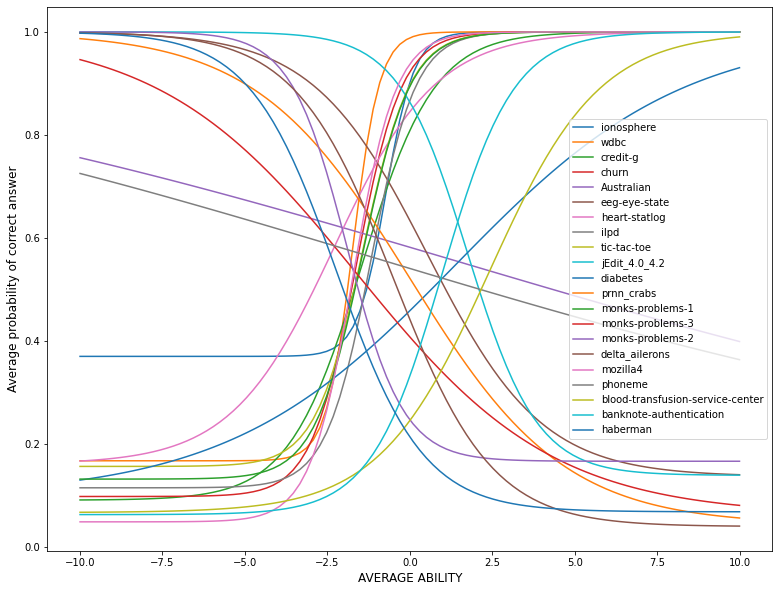

In [ ]:
plt.figure(figsize=(13,10))


x_axis = linspace(-10, 10, 100)

for i,val in enumerate(means_discriminacao_c0):
  #Cluster 0
  a = means_discriminacao_c0[i]
  b = means_dificuldade_c0[i]
  c = means_adivinhacao_c0[i]

  y_axis = c + (1 - c) * (1/(1+math.e**(-a*(x_axis - b))))

  plt.plot(x_axis, y_axis)


  plt.xlabel('AVERAGE ABILITY',fontsize=12)
  plt.ylabel('Average probability of correct answer',fontsize=12)

  plt.legend(list_cluster_0)

plt.savefig('mean_cci_cluster_0.pdf')

Plot of each average ICC per dataset - Cluster 0

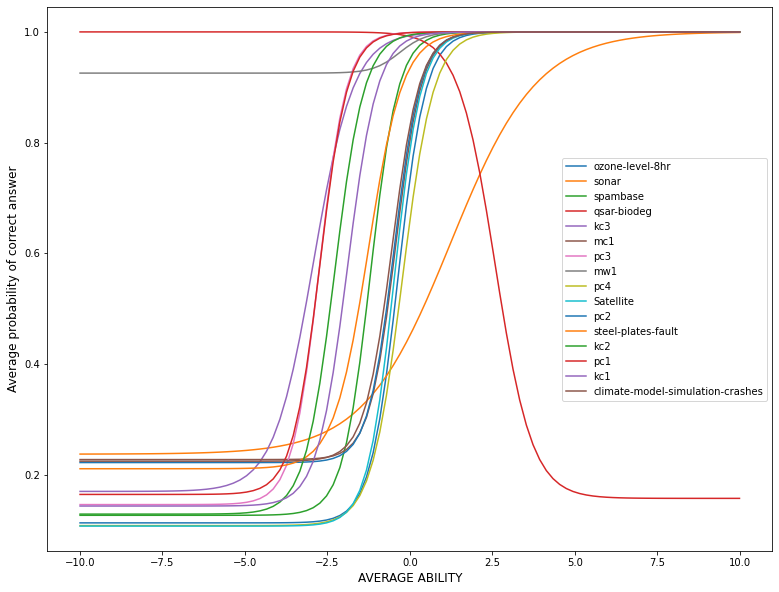

In [ ]:
plt.figure(figsize=(13,10))


x_axis = linspace(-10, 10, 100)

for i,val in enumerate(means_discriminacao_c1):
  #Cluster 0
  a = means_discriminacao_c1[i]
  b = means_dificuldade_c1[i]
  c = means_adivinhacao_c1[i]

  y_axis = c + (1 - c) * (1/(1+math.e**(-a*(x_axis - b))))

  plt.plot(x_axis, y_axis)


  plt.xlabel('AVERAGE ABILITY',fontsize=12)
  plt.ylabel('Average probability of correct answer',fontsize=12)

  plt.legend(list_cluster_1)

plt.savefig('mean_cci_cluster.pdf')

Median of Means - Clusters 0 and 1

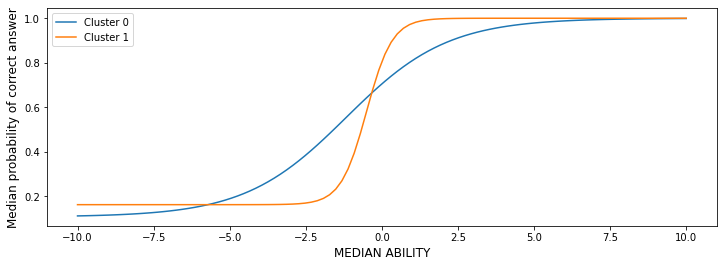

In [ ]:
plt.figure(figsize=(12,4))

x_axis = linspace(-10, 10, 100)
  
#Cluster 0
a = median_discriminacao_c0
b = median_dificuldade_c0
c = median_adivinhacao_c0

y_axis = c + (1 - c) * (1/(1+math.e**(-a*(x_axis - b))))

plt.plot(x_axis, y_axis)

#Cluster 1
a = median_discriminacao_c1
b = median_dificuldade_c1
c = median_adivinhacao_c1

y_axis = c + (1 - c) * (1/(1+math.e**(-a*(x_axis - b))))

plt.plot(x_axis, y_axis)


plt.xlabel('MEDIAN ABILITY',fontsize=12)
plt.ylabel('Median probability of correct answer',fontsize=12)

plt.legend(['Cluster 0','Cluster 1'])

plt.savefig('median_cci_cluster.pdf')


## Named Graphs

24

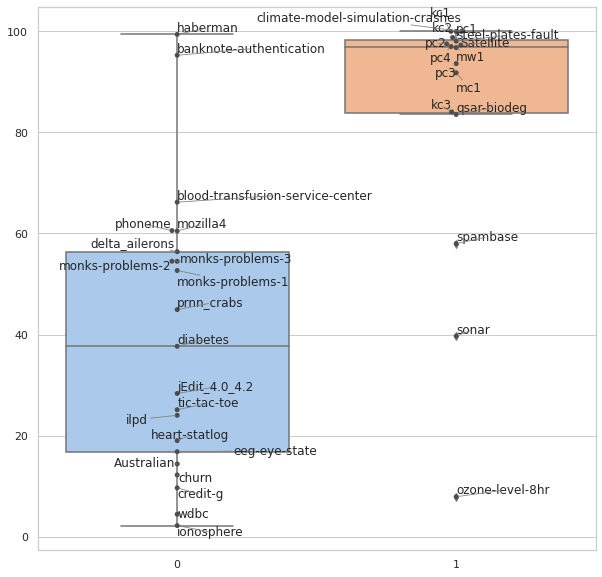

In [ ]:
sns.set(rc={'figure.figsize':(10,10)})
sns.set_theme(style="whitegrid", palette="pastel")
ax = sns.boxplot(data=[df0['Discrimination'],df1['Discrimination']])
ax = sns.swarmplot(data=[df0['Discrimination'],df1['Discrimination']], color='.3')
my_offsets0 = ax.collections[0].get_offsets()
my_offsets1 = ax.collections[1].get_offsets()


texts0 = []
textx0 = []
texty0 = []
for i, xy in enumerate (my_offsets0):
  texts0.append(plt.text(x=xy[0], y=xy[1], s=list_cluster_0[i])) # add label
  textx0.append(xy[0])
  texty0.append(xy[1])

adjust_text(texts0, x=textx0, y=texty0, autoalign='xy', force_points=0,
          arrowprops=dict(arrowstyle="-", color='gray', lw=0.8))

texts1 = []
textx1 = []
texty1 = []
for i, xy in enumerate (my_offsets1):
  texts1.append(plt.text(x=xy[0], y=xy[1], s=list_cluster_1[i])) # add label
  textx1.append(xy[0])
  texty1.append(xy[1])

adjust_text(texts1, x=textx1, y=texty1, autoalign='xy',
          only_move={'points':'y', 'text':'y'}, force_points=0,
          arrowprops=dict(arrowstyle="-", color='gray', lw=0.8))

500

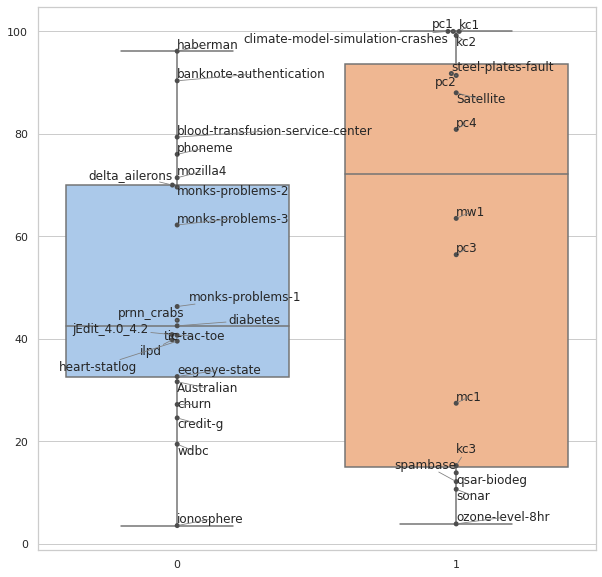

In [ ]:
sns.set(rc={'figure.figsize':(10,10)})
sns.set_theme(style="whitegrid", palette="pastel")
ax = sns.boxplot(data=[df0['Difficulty'],df1['Difficulty']])
ax = sns.swarmplot(data=[df0['Difficulty'],df1['Difficulty']],color='.3')
my_offsets0 = ax.collections[0].get_offsets()
my_offsets1 = ax.collections[1].get_offsets()


texts0 = []
textx0 = []
texty0 = []
for i, xy in enumerate (my_offsets0):
  texts0.append(plt.text(x=xy[0], y=xy[1], s=list_cluster_0[i])) # add label
  textx0.append(xy[0])
  texty0.append(xy[1])

adjust_text(texts0, x=textx0, y=texty0, autoalign='xy', force_points=0,
          arrowprops=dict(arrowstyle="-", color='gray', lw=0.8))

texts1 = []
textx1 = []
texty1 = []
for i, xy in enumerate (my_offsets1):
  texts1.append(plt.text(x=xy[0], y=xy[1], s=list_cluster_1[i])) # add label
  textx1.append(xy[0])
  texty1.append(xy[1])

adjust_text(texts1, x=textx1, y=texty1, autoalign='xy',
          only_move={'points':'y', 'text':'y'}, force_points=0,
          arrowprops=dict(arrowstyle="-", color='gray', lw=0.8))

11

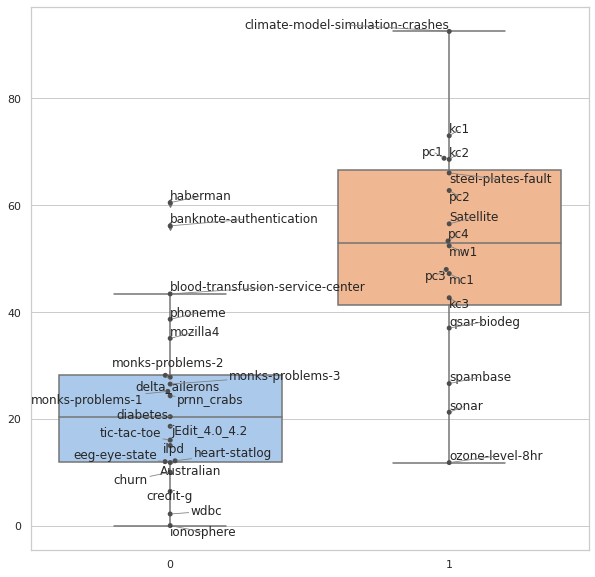

In [ ]:
sns.set(rc={'figure.figsize':(10,10)})
sns.set_theme(style="whitegrid", palette="pastel")
ax = sns.boxplot(data=[df0['Guessing'],df1['Guessing']])
ax = sns.swarmplot(data=[df0['Guessing'],df1['Guessing']],color='.3')
my_offsets0 = ax.collections[0].get_offsets()
my_offsets1 = ax.collections[1].get_offsets()

texts0 = []
textx0 = []
texty0 = []
for i, xy in enumerate (my_offsets0):
  texts0.append(plt.text(x=xy[0], y=xy[1], s=list_cluster_0[i])) # add label
  textx0.append(xy[0])
  texty0.append(xy[1])

adjust_text(texts0, x=textx0, y=texty0, autoalign='xy', force_points=0,
          arrowprops=dict(arrowstyle="-", color='gray', lw=0.8))

texts1 = []
textx1 = []
texty1 = []
for i, xy in enumerate (my_offsets1):
  texts1.append(plt.text(x=xy[0], y=xy[1], s=list_cluster_1[i])) # add label
  textx1.append(xy[0])
  texty1.append(xy[1])

adjust_text(texts1, x=textx1, y=texty1, autoalign='xy',
          only_move={'points':'y', 'text':'y'}, force_points=0,
          arrowprops=dict(arrowstyle="-", color='gray', lw=0.8))

## Final Graph

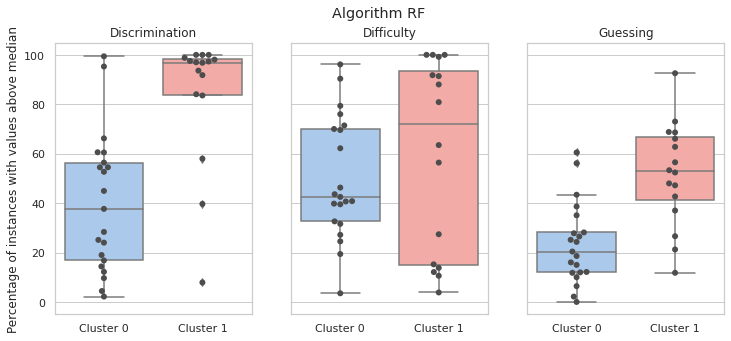

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(12, 5), sharey=True)
fig.suptitle('Algorithm '+str.upper(model_name))

sns.set_theme(style="whitegrid", palette="pastel")
ax = sns.boxplot(ax=axes[0],data=[df0['Discrimination'],df1['Discrimination']],palette={0:'b',1:'r'})
ax.set(ylabel='Percentage of instances with values above median')
ax = sns.swarmplot(ax=axes[0],data=[df0['Discrimination'],df1['Discrimination']],color='.3',size=6)
axes[0].set_title("Discrimination")
labels = [item.get_text() for item in ax.get_xticklabels()]
labels[0] = 'Cluster 0'
labels[1] = 'Cluster 1'
ax.set_xticklabels(labels, rotation=0)



sns.set_theme(style="whitegrid", palette="pastel")
ax = sns.boxplot(ax=axes[1],data=[df0['Difficulty'],df1['Difficulty']],palette={0:'b',1:'r'})
ax = sns.swarmplot(ax=axes[1],data=[df0['Difficulty'],df1['Difficulty']],color='.3',size=6)
axes[1].set_title('Difficulty')
labels = [item.get_text() for item in ax.get_xticklabels()]
labels[0] = 'Cluster 0'
labels[1] = 'Cluster 1'
ax.set_xticklabels(labels, rotation=0)



sns.set_theme(style="whitegrid", palette="pastel")
ax = sns.boxplot(ax=axes[2], data=[df0['Guessing'],df1['Guessing']],palette={0:'b',1:'r'})
ax = sns.swarmplot(ax=axes[2],data=[df0['Guessing'],df1['Guessing']],color='0.3',size=6)
axes[2].set_title('Guessing')

labels = [item.get_text() for item in ax.get_xticklabels()]
labels[0] = 'Cluster 0'
labels[1] = 'Cluster 1'
ax.set_xticklabels(labels, rotation=0)
plt.savefig('parametros de item cluster 0 e 1.pdf')

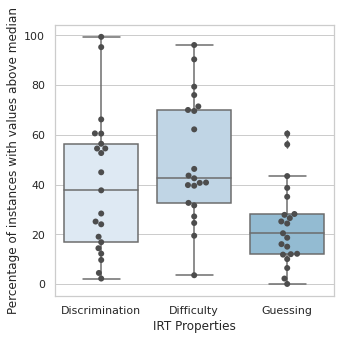

In [ ]:
plt.figure(figsize=(5,5))
sns.set_theme(style="whitegrid", palette="Blues")
ax = sns.boxplot(data=df0)
ax.set(xlabel='IRT Properties', ylabel='Percentage of instances with values above median')
sns.swarmplot(data=df0,color='.3',size=6)
plt.savefig('parametros de item cluster 0.pdf')

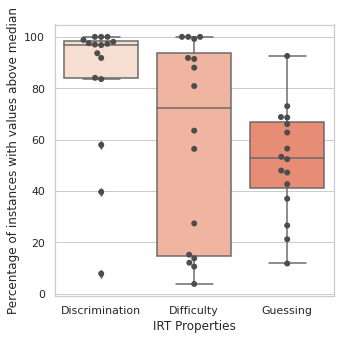

In [ ]:
plt.figure(figsize=(5,5))
sns.set_theme(style="whitegrid", palette='Reds')
ax = sns.boxplot(data=df1)
ax.set(xlabel='IRT Properties', ylabel='Percentage of instances with values above median')
sns.swarmplot(data=df1,color='.3',size=6)
plt.savefig('parametros de item cluster 1.pdf')